# 12: Shor algorithm

In [1]:
from renom_q import *
import math

## 12-1: Classical factorization algorithm

Method of classical factorization (N=15)

We randomly choose a disjoint integer $a\in [2, N-1]=\{2, 4, 7, 8, 11, 13, 14\}$ smaller than $N$.

For example as $a=7$. Consider the function $f(x)=a^x\ \mathrm{mod}\ N\ (x=0, 1, 2, \dots)$ and find the minimum period $r$ that satisfies $f(x)=f(x+r)$.

$$f(x)=f(x+r) \rightarrow a^x\ \mathrm{mod}\ N = a^{x+r}\ \mathrm{mod}\ N \rightarrow a^r\ \mathrm{mod}\ N =1$$

If this period $r$ is an even number, a factor can be found using Euclid's algorithm. If $r$ is an odd number, select the integer $a$ again.

$$a^r\ \mathrm{mod}\ N =1 \rightarrow (a^{r/2}-1)(a^{r/2}+1)\ \mathrm{mod}\ N =0 \rightarrow \mathrm{Find\ the\ greatest\ common\ divisor\ } \mathrm{gcd}(a^{r/2}\pm 1, N)$$

When $N=15$ and $a=7$, you can calculate as follows.

$$f(0)=1,\ \ f(1)=7,\ \ f(2)=4,\ \ f(3)=13,\ \ f(4)=1,\dots$$

Since the period $r=4$ is an even number,

$$a^{r/2}\pm 1 = 7^{4/2} \pm 1 =\{48, 50\} \rightarrow \mathrm{gcd}(48, 15)=3,\ \ \mathrm{gcd}(50, 15)=5$$

Therefore, the factors 3 and 5 of $N=15$ are obtained.

## 12-2: The Quantum circuit

Make function $f(x)=7^x\ \mathrm{mod}\ 15$ a quantum function. When binary number expresses that the numerical value $x=0, 1, 2,...$ of the variable $x$ is added to the function $f(x)=7^x\ \mathrm{mod}\ 15$, it is as shown in the table below.

|$x_0$|$x_1$|$x_2$|$y_0$|$y_1$|$y_2$|$y_3$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0|0|0|0|0|1|
|0|0|1|0|1|1|1|
|0|1|0|0|1|0|0|
| 0 |1|1|1|1|0|1|
|**1**|0|0|0|0|0|1|
|**1**|0|1|0|1|1|1|
|**1**|1|0|0|1|0|0|
|**1**|1|1|1|1|0|1|

A quantum gate is constructed based on this table. For example, in $x=x_0x_1x_2=000=0$, it suffices to apply bit inversion operation X to $y_3$ so that it becomes $y=y_0y_1y_2y_3=0001=1$.

{'0001': 248, '0100': 262, '0111': 242, '1101': 272}


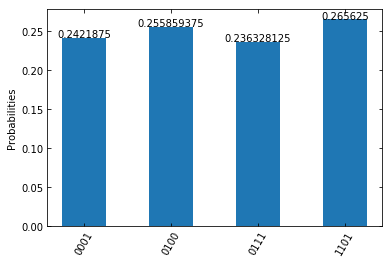

In [2]:
bx = 3
by = 4
cn = 4
qx = QuantumRegister(bx, "xq")
qy = QuantumRegister(by, "yq")
c = ClassicalRegister(cn)
qc = QuantumCircuit(qx, qy, c)


for i in range(bx):
    qc.h(qx[i])

qc.x(qy[3])    
qc.cx(qx[2], qy[1])
qc.cx(qx[2], qy[2])
qc.cx(qx[1], qy[1])
qc.cx(qx[1], qy[3])
qc.ccx(qx[1], qx[2], qy[0])
qc.ccx(qx[1], qx[2], qy[1])
qc.ccx(qx[1], qx[2], qy[2])
qc.ccx(qx[1], qx[2], qy[3])

qc.measure(qy, c)
    
r = execute(qc)
print(r)
plot_histogram(r)

Therefore, since the function value appears repeatedly at the input of 8 types of superposition states as follows, 4 kinds of outputs are obtained.

$$\left| f(0) \right\rangle + \left| f(1) \right\rangle + \left| f(2) \right\rangle + \left| f(3) \right\rangle + \left| f(4) \right\rangle + \left| f(5) \right\rangle + \left| f(6) \right\rangle + \left| f(7) \right\rangle \rightarrow \left| 1 \right\rangle + \left| 7 \right\rangle + \left| 4 \right\rangle + \left| 13 \right\rangle$$

## 12-3: Quantum oracle

Quantum oracle
$$\left| x \right\rangle \left| y \right\rangle \xrightarrow{U_f} \left| x \right\rangle \left| y \oplus f(x) \right\rangle$$

When $\left| y \right\rangle$ is set to $\left| 0 \right\rangle$, the output becomes $f(x)$ only.
$$\left| x \right\rangle \left| 0 \right\rangle \xrightarrow{U_f} \left| x \right\rangle \left| 0 \oplus f(x) \right\rangle = \left| x \right\rangle \left| f(x) \right\rangle$$

By applying the superposition state to this expression, shift invariance works for function $f(x)=7^x\ \mathrm{mod}\ 15$, and although there is a difference in phase, it becomes as follows.

$$\left| 0 \right\rangle \left| 0 \right\rangle \xrightarrow{H \otimes I} \xrightarrow{U_f} \xrightarrow{QFT^{-1} \otimes I} \left( \left| 0 \right\rangle + \left| 2 \right\rangle + \left| 4 \right\rangle + \left| 6 \right\rangle \right) \left| f(x) \right\rangle$$

That is, no matter what function value $\left| 1 \right\rangle,\ \ \left| 4 \right\rangle,\ \ \left| 7 \right\rangle,\ \ \left| 13 \right\rangle$ is observed, if $\left| x \right\rangle$ is subjected to inverse quantum Fourier transform, only the same quantum state $\left| 0 \right\rangle,\ \ \left| 2 \right\rangle,\ \ \left| 4 \right\rangle,\ \ \left| 6 \right\rangle$ is observed, although there is a difference in phase due to shift invariance.

$$\left| 0 \right\rangle \left| 0 \right\rangle + \left| 4 \right\rangle \left| 0 \right\rangle \rightarrow \left| 0 \right\rangle \left| f(0) \right\rangle + \left| 4 \right\rangle \left| f(4) \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle + \left| 4 \right\rangle \left| 1 \right\rangle = \left( \left| 0 \right\rangle + \left| 4 \right\rangle \right) \left| 1 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 1 \right\rangle$$

$$\left| 1 \right\rangle \left| 0 \right\rangle + \left| 5 \right\rangle \left| 0 \right\rangle \rightarrow \left| 1 \right\rangle \left| f(1) \right\rangle + \left| 5 \right\rangle \left| f(5) \right\rangle = \left| 1 \right\rangle \left| 7 \right\rangle + \left| 5 \right\rangle \left| 7 \right\rangle = \left( \left| 1 \right\rangle + \left| 5 \right\rangle \right) \left| 7 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 7 \right\rangle$$

$$\left| 2 \right\rangle \left| 0 \right\rangle + \left| 6 \right\rangle \left| 0 \right\rangle \rightarrow \left| 2 \right\rangle \left| f(2) \right\rangle + \left| 6 \right\rangle \left| f(6) \right\rangle = \left| 2 \right\rangle \left| 4 \right\rangle + \left| 6 \right\rangle \left| 4 \right\rangle = \left( \left| 2 \right\rangle + \left| 6 \right\rangle \right) \left| 4 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 4 \right\rangle$$

$$\left| 3 \right\rangle \left| 0 \right\rangle + \left| 7 \right\rangle \left| 0 \right\rangle \rightarrow \left| 3 \right\rangle \left| f(3) \right\rangle + \left| 7 \right\rangle \left| f(7) \right\rangle = \left| 3 \right\rangle \left| 13 \right\rangle + \left| 7 \right\rangle \left| 13 \right\rangle = \left( \left| 3 \right\rangle + \left| 7 \right\rangle \right) \left| 13 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 13 \right\rangle$$

{'000': 238, '010': 286, '100': 266, '110': 234}


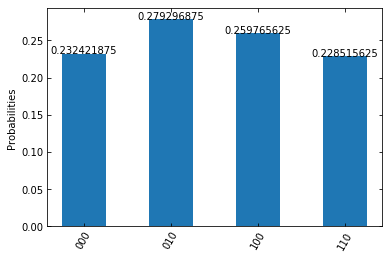

In [3]:
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)), q[i], q[j])
        qci.h(q[i])

def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)

bx = 3
by = 4
cn = 3
qx = QuantumRegister(bx, "xq")
qy = QuantumRegister(by, "yq")
c = ClassicalRegister(cn)
qc = QuantumCircuit(qx, qy, c)

for i in range(bx):
    qc.h(qx[i])

qc.x(qy[3])    
qc.cx(qx[2], qy[1])
qc.cx(qx[2], qy[2])
qc.cx(qx[1], qy[1])
qc.cx(qx[1], qy[3])
qc.ccx(qx[1], qx[2], qy[0])
qc.ccx(qx[1], qx[2], qy[1])
qc.ccx(qx[1], qx[2], qy[2])
qc.ccx(qx[1], qx[2], qy[3])
qc.barrier(qx)
iqft(qc, qx, bx)
swap(qc, qx[0], qx[2])

qc.measure(qx, c)
    
r = execute(qc)
print(r)
plot_histogram(r)

By observing the quantum bit $\left| x \right\rangle$, 0, 2, 4, and 6 were obtained as observed values $s$. For $k \in \{ 0,1,2,3,4,5,6,7\}$, the cycle $T$ of the function can be estimated as 2 and 4 as the period $T$ as the estimate of 3 bits of $k/T$ as follows.

$$s=2^3 \left( \frac{k}{T} \right) \rightarrow \frac{s}{8}=\frac{k}{T} = \left(
\begin{array}{r}
\frac{0}{8}=0 \rightarrow T=(\times) \\
\frac{2}{8}=\frac{1}{4} \rightarrow T=4(\circ) \\
\frac{4}{8}=\frac{1}{2} \rightarrow T=2(\times) \\
\frac{6}{8}=\frac{3}{4} \rightarrow T=4(\circ)
\end{array}
\right.$$

From this result, it can be found that the period $T$ is 4 with a probability of 50%.   
Since $T=r=4$ is an even number, Factors 3 and 5 of $N=15$ can be obtained by finding the greatest common divisor (gcd) by Euclid's algorithm.

$$a^{r/2}\pm 1 = 7^{4/2} \pm 1 =\{48, 50\} \rightarrow \mathrm{gcd}(48, 15)=3,\ \ \mathrm{gcd}(50, 15)=5$$